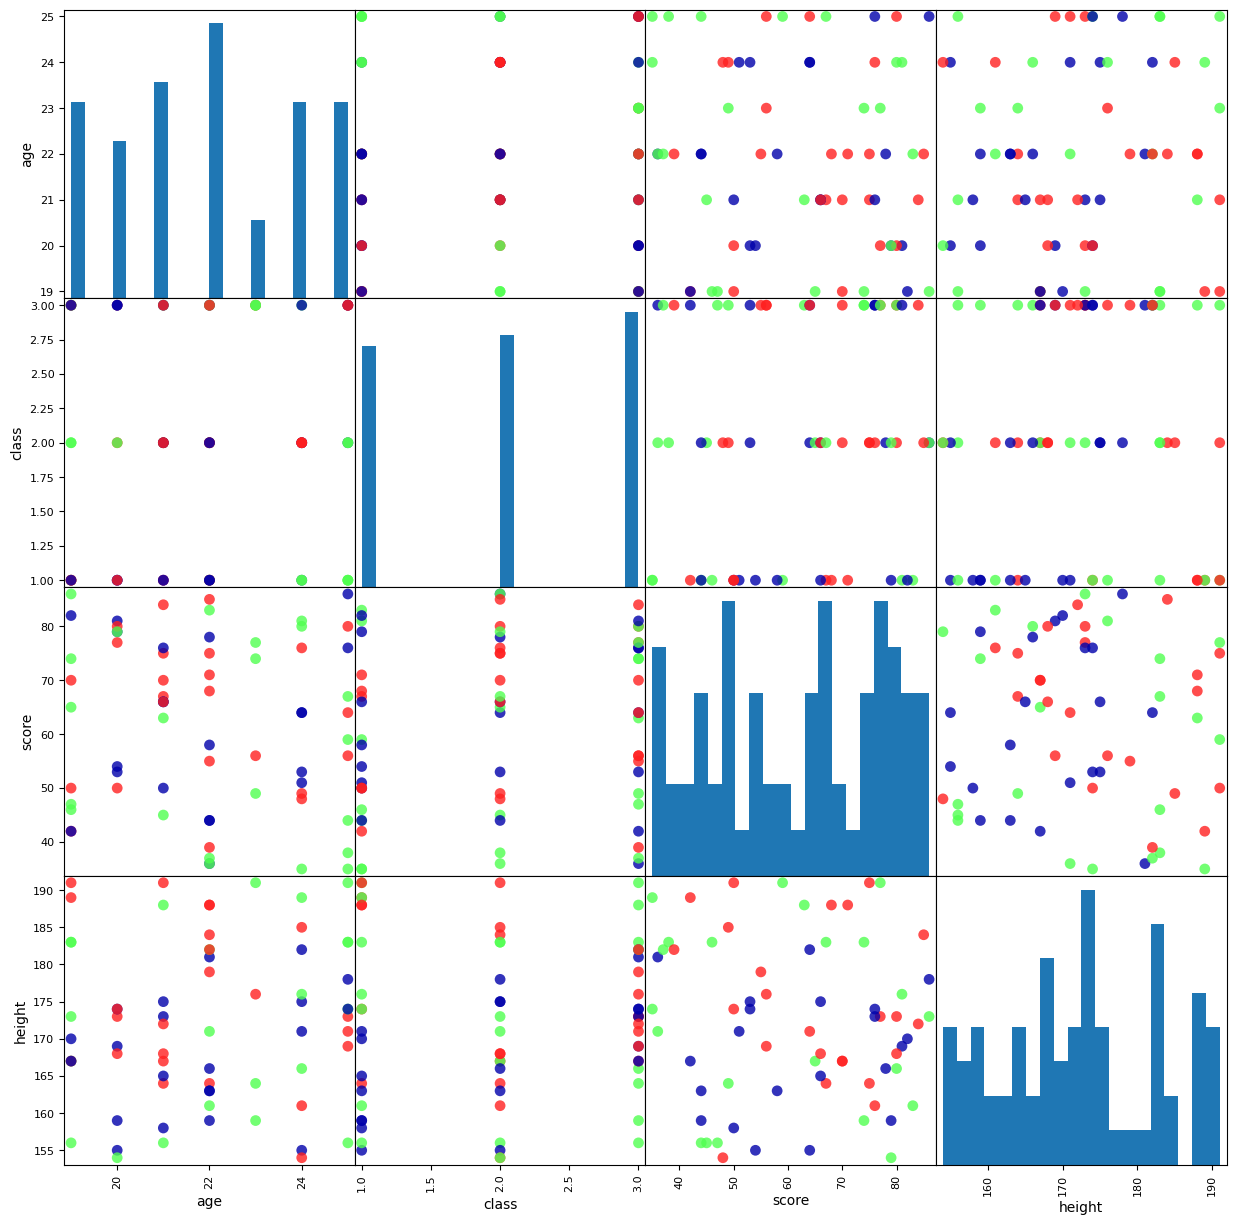

Test values: [[20, 1, 68, 174], [19, 1, 77, 179], [19, 2, 82, 185], [23, 2, 40, 183], [21, 3, 47, 162], [22, 2, 51, 184], [24, 2, 61, 176], [20, 2, 83, 184], [22, 3, 68, 164], [21, 3, 75, 178], [23, 1, 56, 174], [19, 1, 80, 173], [21, 2, 36, 184], [21, 3, 52, 177], [19, 1, 76, 186], [22, 1, 53, 167], [22, 1, 64, 171], [25, 2, 59, 184], [19, 3, 50, 157], [20, 2, 68, 187], [22, 1, 70, 162], [19, 1, 73, 173], [24, 3, 49, 171]]
Test predictions: [0 0 1 1 2 0 0 1 0 0 0 0 2 0 0 0 0 1 0 0 0 0 1]
accuracy of this model is: 0.39
prediction is: [0]
target name of prediction is: ['American']


In [25]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import Bunch
%matplotlib inline

dataset=[[21, 1, 66, 165], [19, 1, 50, 191], [20, 1, 68, 174], [20, 1, 54, 155], [21, 1, 67, 164], [24, 1, 81, 176], [19, 1, 73, 173], [23, 1, 56, 174], [19, 1, 76, 186], [22, 1, 44, 159], [22, 1, 71, 188], [25, 1, 59, 191], [19, 1, 82, 170], [19, 1, 77, 179], [22, 1, 83, 161], [20, 1, 79, 159], [22, 1, 53, 167], [25, 1, 44, 156], [24, 1, 51, 171], [19, 1, 42, 189], [24, 1, 35, 189], [22, 1, 58, 163], [22, 1, 70, 162], [19, 1, 46, 183], [22, 1, 64, 171], [22, 1, 68, 188], [19, 1, 80, 173], [21, 1, 50, 158], [20, 1, 50, 174], [25, 1, 35, 174], [22, 2, 51, 184], [24, 2, 48, 154], [22, 2, 36, 171], [21, 2, 36, 184], [21, 2, 75, 191], [25, 2, 38, 183], [22, 2, 78, 166], [20, 2, 80, 168], [19, 2, 65, 167], [22, 2, 44, 163], [21, 2, 70, 167], [23, 2, 40, 183], [20, 2, 68, 187], [20, 2, 83, 184], [25, 2, 67, 183], [24, 2, 61, 176], [21, 2, 66, 168], [20, 2, 79, 154], [25, 2, 86, 178], [22, 2, 75, 164], [21, 2, 45, 156], [24, 2, 64, 155], [24, 2, 49, 185], [19, 2, 82, 185], [24, 2, 53, 175], [24, 2, 76, 161], [25, 2, 59, 184], [21, 2, 66, 175], [22, 2, 85, 184], [19, 2, 86, 173], [20, 3, 81, 169], [24, 3, 49, 171], [19, 3, 47, 156], [21, 3, 52, 177], [25, 3, 64, 171], [22, 3, 37, 182], [21, 3, 47, 162], [21, 3, 84, 172], [24, 3, 80, 166], [19, 3, 42, 167], [22, 3, 39, 182], [21, 3, 63, 188], [24, 3, 64, 182], [25, 3, 80, 173], [23, 3, 74, 159], [20, 3, 53, 174], [25, 3, 56, 169], [19, 3, 50, 157], [22, 3, 68, 164], [22, 3, 55, 179], [19, 3, 74, 183], [22, 3, 36, 181], [20, 3, 77, 173], [23, 3, 77, 191], [25, 3, 76, 174], [19, 3, 70, 167], [23, 3, 49, 164], [21, 3, 76, 173], [23, 3, 56, 176], [21, 3, 75, 178]]
people=Bunch()
people = {
    'data': dataset,
    'target': np.array([0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2,0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2,0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]),
    'target_names': np.array(['American', 'Nigerian', 'Jamaican'])
}
#change people to Bunch datatype to be able to get shape: (x,y)-> x:no of dat points, y:no of features

X_train, X_test,y_train,y_test= train_test_split(
    people['data'], people['target'], random_state=0
)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
people_dataframe = pd.DataFrame(
    X_train, columns=['age','class', 'score', 'height']
)
grr=pd.plotting.scatter_matrix(
    people_dataframe, c=y_train,
    figsize=(15,15),
    marker='o',
    hist_kwds={'bins':20},
    s=60,
    alpha=0.8,
    cmap=mglearn.cm3,
)
plt.show()

knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_scaled, y_train)
print(f"Test values: {X_test}")
print(f"Test predictions: {knn.predict(X_test_scaled)}")
accuracy=knn.score(X_test_scaled, y_test)
print(f"accuracy of this model is: {accuracy:.2f}")

X_new = np.array([[22,3, 72, 180]])
prediction = knn.predict(scaler.transform(X_new))
print(f"prediction is: {prediction}")
print(f"target name of prediction is: {people['target_names'][prediction]}")


0.3725827384815056


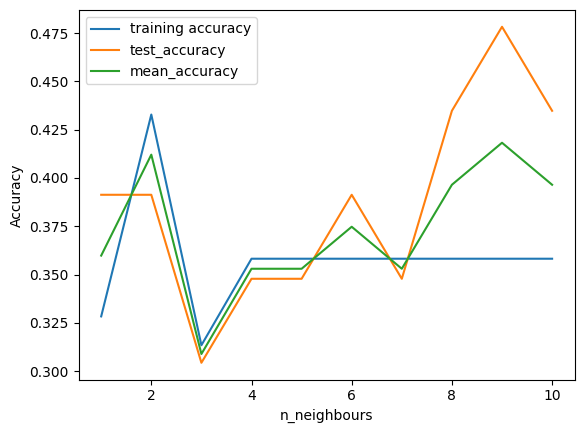

In [24]:
neighbors_config=range(1,11)
training_accuracy=[]
test_accuracy=[]
mean_accuracy=[]

for n in neighbors_config:
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_scaled, y_train)
    x1=knn.score(X_train, y_train)
    x2=knn.score(X_test_scaled, y_test)
    training_accuracy.append(x1)
    test_accuracy.append(x2)
    mean_accuracy.append((x1+x2)/2)
plt.plot(neighbors_config, training_accuracy, label="training accuracy")
plt.plot(neighbors_config, test_accuracy, label="test_accuracy")
plt.plot(neighbors_config, mean_accuracy, label="mean_accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbours")
plt.legend()
